# Cabeçalho

**Universidade Positivo**

**Nome:**  Vinícius Kruchelski Gugelmin

**Turma:** Osório - Noite - 4ª feira

# Configuração de ambiente

Importação das bibliotecas:

- Numpy: para computação numérica
- Pandas: para manipulação de dados através do alias "pd"
- Google Colab: para manipulação de arquivos no Google Drive
- Matplotlib: para criação de gráficos e visualizações de dados
- Seaborn: para visualização de dados
- Warnings: para poder alterar a visualização de warnings do sistema

E execução do comando "%matplotlib inline" para que os gráficos sejam exibidos no notebook logo abaixo da célula de código que os gerou.

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

%matplotlib inline

Carregamento do Drive para que o notebook possa acessar os arquivos do Google Drive e com o parâmetro "force_remount=True" para que o Drive seja montado a cada execução do notebook.

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Leitura e visualização do dataset

Leitura do dataset através da função "read_csv" do Pandas e armazenamento do resultado na variável "df".

Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Notebooks/data/microdados_enem_2019_sp.csv',
                      sep=',', encoding='utf-8')

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [4]:
df.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-Guaçu,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B


# Criação de funções utilitárias

In [5]:
def contLinhasDfFormatado(_df):
  aux = f'{len(_df):_.0f}'
  aux = aux.replace('.', ',')
  return aux.replace('_', '.')

# Perguntas iniciais

- Quantas pessoas fizeram a prova?

In [6]:
cont_df = contLinhasDfFormatado(df)

print("Total:", cont_df)

Total: 581.171


É importante analisar primeiramente qual a quantidade de dados estamos para analisar

- Quantas pessoas do sexo masculino (M) e feminino (F) fizeram a prova?

In [7]:
df_m = df[df['SEXO'] == "M"]
df_f = df[df['SEXO'] == "F"]

print("M:", contLinhasDfFormatado(df_m))
print("F:", contLinhasDfFormatado(df_f))


M: 241.201
F: 339.970


Verifico se há uma grande diferença ou não entre o sexo dos participantes.

- Qual a porcentagem de homens e mulheres que fizeram a prova?

In [8]:
porcentagem_m = (len(df_m)/len(df))*100
porcentagem_f = (len(df_f)/len(df))*100

print("Porcentagem de homens:", f'{porcentagem_m:.1f}%')
print("Porcentagem de mulheres:", f'{porcentagem_f:.1f}%')

Porcentagem de homens: 41.5%
Porcentagem de mulheres: 58.5%


Percebo que não, mas acho interessante ressaltar essa diferença pendendo para o lado das mulheres.

- Qual a idade da pessoa mais velha e mais nova que fizeram a prova?

In [9]:
maior_idade = df['IDADE'].max()
menor_idade = df['IDADE'].min()

print("Mais velha:", maior_idade, "anos")
print("Mais nova:", menor_idade, "anos")

Mais velha: 91 anos
Mais nova: 12 anos


Tentamos analisar então um pouco da idade dos participantes, notando uma variação enorme do mais velho para o mais novo.

- Quantos menores de 18 anos fizeram a prova?

In [10]:
df_menores_idade = df[df['IDADE'] < 18]

print("Menores de idade:", contLinhasDfFormatado(df_menores_idade))

Menores de idade: 247.613


Ressaltando ainda mais com a quantidade de participantes menores de 18 anos.

- Qual a porcentagem de menores de idade que fizeram a prova?

In [11]:
porcentagem_menor_idade = (len(df_menores_idade)/len(df))*100

print("Porcentagem de menores de idade:", f'{porcentagem_menor_idade:.1f}%')

Porcentagem de menores de idade: 42.6%


E agora com a porcentagem acima.

# Visualização dos dados

- Visualização dos dados já apresentados com a disparidade de menores de idade realizando o ENEM através de histograma usando o método **sturges** para determinar o número de intervalos.

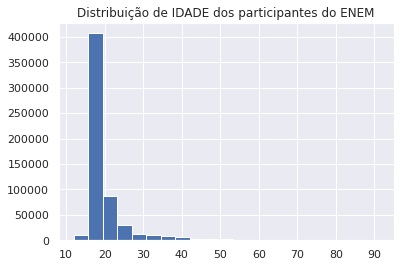

In [12]:
bins = np.histogram_bin_edges(df.IDADE, bins='sturges')
bins

df["IDADE"].hist(bins=bins)
plt.title('Distribuição de IDADE dos participantes do ENEM')
plt.show()   

- Visualização dos dados já apresentados com o percentual de homens e mulheres que realizaram o ENEM utilizando o método **histplot** do **seaborn**.

[Text(0.5, 1.0, 'Pecentual de homens e mulheres no ENEM')]

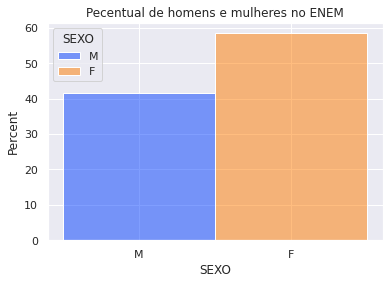

In [13]:
sns.histplot(data=df, x="SEXO", hue="SEXO", stat="percent", palette="bright").set(title='Pecentual de homens e mulheres no ENEM')

- Visualização dos dados de idade por sexo separados por colunas com a intenção de tentar identifcar algum grupo de idade em que o grupo masculino se sobressai.

[Text(0.5, 1.0, 'Distribuição de idade por sexo de participantes do ENEM')]

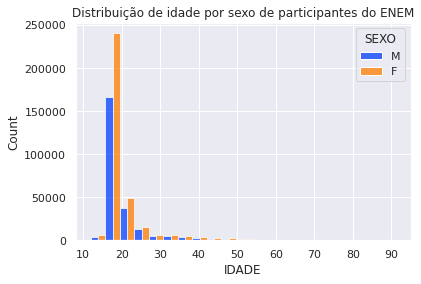

In [14]:
sns.histplot(data=df, x="IDADE", hue="SEXO", multiple="dodge", palette="bright", bins=bins).set(title='Distribuição de idade por sexo de participantes do ENEM')

Apesar da dificuldade de visualizar com exatidão, devido aos outliers, percebemos que o grupo feminino é predominante em quase todas as idades, senão todas.

- Visualização de concentração de idade por sexo para tentar identificar onde começam os grupos relevantes a serem analisados, e onde se encontram os outliers.

[Text(0.5, 1.0, 'Visualização de concentração de idade por sexo de participantes do ENEM')]

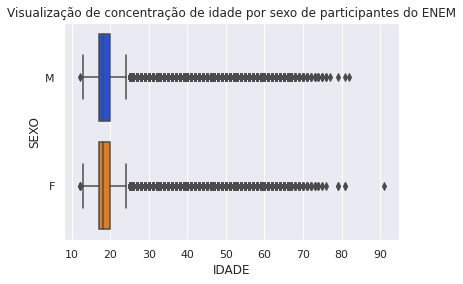

In [15]:
sns.boxplot(data=df, x="IDADE", y="SEXO", palette="bright").set(title='Visualização de concentração de idade por sexo de participantes do ENEM')

Percebemos então que temos outliers por volta dos 80 e 90 anos, mas precisamos analisar com outros gráficos para ter certeza e tentar pegar apenas o grupo de maior concentração.

- Visualização de concentração de idade por sexo abaixo dos 50 anos para tentar achar o grupo predominante.

[Text(0.5, 1.0, 'Visualização de concentração de idade por sexo de participantes do ENEM com menos 50 anos')]

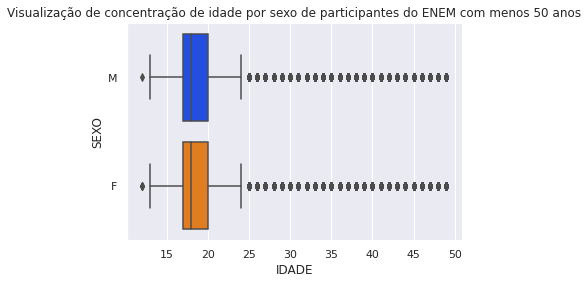

In [16]:
df_menor_cinquenta = df[df['IDADE'] < 50]
sns.boxplot(data=df_menor_cinquenta, x="IDADE", y="SEXO", palette="bright").set(title='Visualização de concentração de idade por sexo de participantes do ENEM com menos 50 anos')

Diminuindo a variação de idade percemos que o grupo se encontra entre os menores de 24 anos e maiores de 13, sendo assim, vamos retira-los para ter essa certeza e conseguir formular outros gráficos.

- Visualização de concentração de idade por sexo abaixo de 24 anos e maior de 13 anos.

[Text(0.5, 1.0, 'Visualização de concentração de idade por sexo de participantes do ENEM entre 14 - 23 anos')]

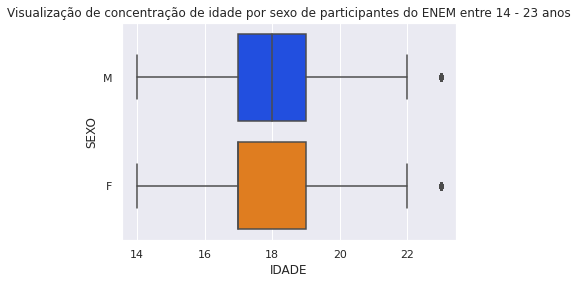

In [17]:
df_sem_outlier = df[df['IDADE'] < 24]
df_sem_outlier = df_sem_outlier[df_sem_outlier['IDADE'] > 13]
sns.boxplot(data=df_sem_outlier, x="IDADE", y="SEXO", palette="bright").set(title='Visualização de concentração de idade por sexo de participantes do ENEM entre 14 - 23 anos')

Apenas confirmando a hipótese apontada acima.

- Visualização de distribuição de idade por sexo da concentração dividida acima.

[Text(0.5, 1.0, 'Distribuição de idade por sexo de participantes do ENEM entre 14 - 23 anos')]

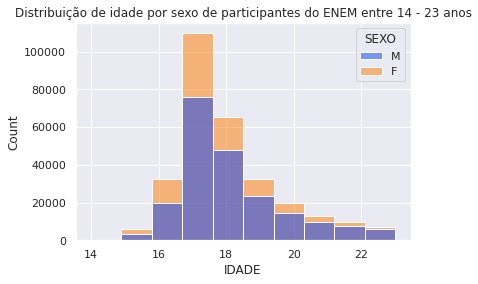

In [18]:
sns.histplot(data=df_sem_outlier, x="IDADE", hue="SEXO", palette="bright", bins=10).set(title='Distribuição de idade por sexo de participantes do ENEM entre 14 - 23 anos')

Mesmo separando para visualizar a concentração de idade, continumaos com a afirmação de que o grupo feminino predomina em quase todas, senão todas as idades,

- Visualização de distribuição de idade por sexo da concentração dividida acima com KDE para visualizar a curvatura.

[Text(0.5, 1.0, 'Distribuição de idade por sexo de participantes do ENEM entre 14 - 23 anos com KDE')]

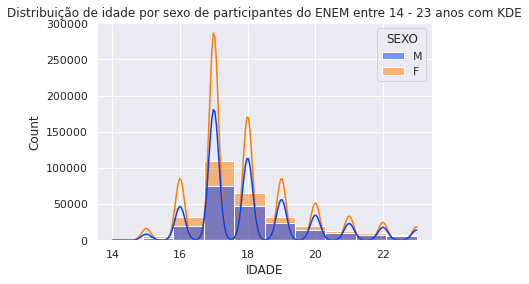

In [19]:
sns.histplot(data=df_sem_outlier, x="IDADE", kde=True, hue="SEXO", palette="bright", bins=10).set(title='Distribuição de idade por sexo de participantes do ENEM entre 14 - 23 anos com KDE')

# Seleção de dados

- Nesta etapa vamos filtrar os dados por cor/raça para analisar esse lado do dataset, fazendo uma listagem ordenada da cor/raça que mais apareceu no ENEM para a que menos apareceu.

In [20]:
df_raca_grupo = df.groupby(["COR_RACA"]).size().reset_index(name="COUNT").sort_values(by="COUNT", ascending=False)
df_raca_grupo

,COR_RACA,COUNT
1,branca,336478
4,parda,165280
5,preta,54290
0,amarela,14496
3,nao_declarado,8541
2,indigena,2086


Identificamos que pessoas da cor/raça branca são as que mais apareceram para o ENEM e indígenas as que menos apareceram. Também identificamos pessoa que escolheram a opção "nao_declarado" para cor/raça, isso será retirado em alguns momentos para analisar apenas opções relevantes para a analise escolhida.

- Listagem de cor/raça com ordenação.

In [21]:
lista_raca = list(df_raca_grupo["COR_RACA"])
lista_raca

['branca', 'parda', 'preta', 'amarela', 'nao_declarado', 'indigena']

- Listagem das 3 cores/raças que mais apareceram no ENEM.

In [22]:
lista_raca_maior = df_raca_grupo.sort_values(by="COUNT", ascending=False)
lista_raca_maior = list(lista_raca_maior.head(3)["COR_RACA"])
lista_raca_maior

['branca', 'parda', 'preta']

- Listagem das 3 cores/raças que menos apareceram no ENEM.

In [23]:
lista_raca_menor = df_raca_grupo.sort_values(by="COUNT", ascending=True)
lista_raca_menor = list(lista_raca_menor.head(3)["COR_RACA"])
lista_raca_menor

['indigena', 'nao_declarado', 'amarela']

- Criação de um dataframe ordenado pela lista criada da cor/raça que mais apareceu no ENEM para a que menos apareceu.

In [24]:
df_raca = df.set_index('COR_RACA')
df_raca = df_raca.loc[lista_raca]
df_raca

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,COD_ESCOLA,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
COR_RACA,,,,,,,,,,,,,,,,,,,,,
branca,"1,90E+11",Guarulhos,23,F,solteiro(a),brasileiro(a),ja_concluiu,nao_declarado,nao,NaN,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
branca,"1,90E+11",São José do Rio Preto,18,F,solteiro(a),brasileiro(a),conclui_2019,publica,nao,35028927.0,...,612.8,espanhol,sem_problemas,120.0,160.0,120.0,80.0,100.0,580.0,A
branca,"1,90E+11",São Paulo,26,M,solteiro(a),brasileiro(a),ja_concluiu,nao_declarado,nao,NaN,...,681.2,espanhol,sem_problemas,180.0,200.0,200.0,200.0,120.0,900.0,B
branca,"1,90E+11",Campinas,17,F,solteiro(a),brasileiro(a),ja_concluiu,nao_declarado,nao,NaN,...,496.5,ingles,sem_problemas,160.0,120.0,140.0,140.0,120.0,680.0,B
branca,"1,90E+11",São Paulo,18,F,solteiro(a),brasileiro(a),conclui_2019,privada,nao,35132287.0,...,49.1,ingles,sem_problemas,160.0,140.0,140.0,160.0,160.0,760.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
indigena,"1,90E+11",Praia Grande,18,M,solteiro(a),brasileiro(a),conclui_2019,publica,nao,35269335.0,...,595.3,ingles,sem_problemas,120.0,120.0,100.0,100.0,80.0,520.0,B
indigena,"1,90E+11",Itaquaquecetuba,17,F,solteiro(a),brasileiro(a),conclui_2019,publica,nao,35923936.0,...,544.2,ingles,sem_problemas,80.0,120.0,80.0,100.0,100.0,480.0,B
indigena,"1,90E+11",São Paulo,17,F,solteiro(a),brasileiro(a),conclui_2019,publica,nao,35924647.0,...,399.4,espanhol,sem_problemas,120.0,120.0,120.0,160.0,40.0,560.0,B


- Criação de um dataframe com as raças que mais apareceram no ENEM.

In [25]:
df_raca_maior = df[df["COR_RACA"].isin(lista_raca_maior)]
df_raca_maior

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-Guaçu,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581166,"1,90E+11",São Paulo,18,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,479.1,espanhol,sem_problemas,100.0,120.0,120.0,140.0,100.0,580.0,B
581167,"1,90E+11",São Paulo,17,F,solteiro(a),preta,brasileiro(a),conclui_2019,publica,nao,...,43.2,espanhol,sem_problemas,80.0,120.0,140.0,120.0,100.0,560.0,B
581168,"1,90E+11",São Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,487.3,ingles,sem_problemas,120.0,80.0,60.0,120.0,0.0,380.0,B
581169,"1,90E+11",São Paulo,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,401.1,ingles,sem_problemas,160.0,120.0,160.0,140.0,160.0,740.0,A


- Criação de um dataframe com as raças que menos apareceram no ENEM.

In [26]:
df_raca_menor = df[df["COR_RACA"].isin(lista_raca_menor)]
df_raca_menor

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
24,"1,90E+11",Leme,20,F,solteiro(a),nao_declarado,brasileiro(a),ja_concluiu,nao_declarado,nao,...,836.3,ingles,sem_problemas,160.0,200.0,180.0,160.0,200.0,900.0,B
27,"1,90E+11",Votorantim,19,M,solteiro(a),amarela,brasileiro(a),conclui_2019,publica,nao,...,490.3,ingles,sem_problemas,120.0,120.0,120.0,120.0,0.0,480.0,B
44,"1,90E+11",Américo Brasiliense,23,M,solteiro(a),nao_declarado,brasileiro(a),ja_concluiu,nao_declarado,nao,...,409.5,espanhol,sem_problemas,100.0,200.0,120.0,160.0,140.0,720.0,B
71,"1,90E+11",Guarulhos,27,M,solteiro(a),nao_declarado,brasileiro(a),ja_concluiu,nao_declarado,nao,...,743.8,ingles,sem_problemas,120.0,180.0,120.0,120.0,160.0,700.0,B
123,"1,90E+11",Palestina,21,F,solteiro(a),amarela,brasileiro(a),ja_concluiu,nao_declarado,nao,...,410.6,espanhol,sem_problemas,120.0,120.0,120.0,80.0,140.0,580.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580926,"1,90E+11",São José do Rio Preto,20,F,solteiro(a),indigena,brasileiro(a),ja_concluiu,nao_declarado,nao,...,446.6,ingles,sem_problemas,180.0,200.0,180.0,200.0,200.0,960.0,B
580986,"1,90E+11",Mirassol,17,F,solteiro(a),nao_declarado,brasileiro(a),nao_concluiu,nao_declarado,sim,...,645.3,ingles,sem_problemas,160.0,180.0,160.0,160.0,120.0,780.0,B
581020,"1,90E+11",São Vicente,19,M,divorciado(a),nao_declarado,brasileiro(a),conclui_2019,publica,nao,...,425.4,ingles,sem_problemas,120.0,40.0,40.0,80.0,0.0,280.0,A
581099,"1,90E+11",São Paulo,19,F,solteiro(a),amarela,brasileiro(a),ja_concluiu,nao_declarado,nao,...,671.7,ingles,sem_problemas,100.0,40.0,40.0,100.0,0.0,280.0,B


# Análise de similaridades

- Nesta etapa vamos criar uma correlação para analisar similaridades entre cor/raça com tipo de escola dos participantes.

In [27]:
def gerarDf():
  df_cross = pd.crosstab(df.COR_RACA, df.ESCOLA)
  df_cross['total'] = df_cross['nao_declarado'] + df_cross['privada'] + df_cross['publica']
  df_cross = df_cross.sort_values('total', ascending=False)
  return df_cross

df_cross = gerarDf()
df_cross

ESCOLA,nao_declarado,privada,publica,total
COR_RACA,,,,
branca,198379,44121,93978,336478
parda,98516,7091,59673,165280
preta,33634,1715,18941,54290
amarela,8942,2051,3503,14496
nao_declarado,5343,860,2338,8541
indigena,1100,85,901,2086


Analisando por cima, conseguimos identificar que se sobressai os "não declarados em relação ao tipo de escola, então vamos retirar eles e também os de cor/raça para não interferir no objetivo da nossa análise.

- Correlação de similaridade entre cor/raça com tipo de escola dos participantes sem os "não declarados"

In [28]:
def gerarDfTratada():
  df_cross_tratada = df_cross.drop('nao_declarado', axis=1)
  df_cross_tratada = df_cross_tratada.drop('nao_declarado', axis=0)
  df_cross_tratada['total'] = df_cross_tratada['privada'] + df_cross_tratada['publica']
  return df_cross_tratada

df_cross_tratada = gerarDfTratada()
df_cross_tratada

ESCOLA,privada,publica,total
COR_RACA,,,
branca,44121,93978,138099
parda,7091,59673,66764
preta,1715,18941,20656
amarela,2051,3503,5554
indigena,85,901,986


Podendo visualizar melhor, conseguimos identificar que temos mais participantes de escola pública em todas as cores/raças do que de escolas privadas, mas em algumas cores/raças essa proporção aumenta.

- Correlação de similaridade entre cor/raça com tipo de escola dos participantes sem os "não declarados" com visualização de porcentagem

In [29]:
df_cross_tratada = gerarDfTratada()
df_cross_tratada

df_cross_percent = df_cross_tratada
df_cross_percent['privada'] = (df_cross_percent['privada']/df_cross_percent['total'])*100
df_cross_percent['publica'] = (df_cross_percent['publica']/df_cross_percent['total'])*100
df_cross_percent

ESCOLA,privada,publica,total
COR_RACA,,,
branca,31.948819,68.051181,138099
parda,10.620993,89.379007,66764
preta,8.302672,91.697328,20656
amarela,36.928340,63.071660,5554
indigena,8.620690,91.379310,986


- Remoção da tabela total com ordenação de porcentagem por escola pública

In [30]:
df_cross_percent_order_pb = df_cross_percent.sort_values('publica', ascending=False)
df_cross_percent_order_pb = df_cross_percent_order_pb.drop('total', axis=1)
df_cross_percent_order_pb

ESCOLA,privada,publica
COR_RACA,,
preta,8.302672,91.697328
indigena,8.620690,91.379310
parda,10.620993,89.379007
branca,31.948819,68.051181
amarela,36.928340,63.071660


Agora que temos a porcentagem dessa proporção, essa correlação nos traz a informação de que pessoas da cor/raça preta e indígena que participaram do ENEM são quase que 100% (mais de 90%) de escolas públicas, sendo bem diferente para a cor/raça branca e amarela, que possuem bem mais pessoas de escolas privadas.

- Geração de matriz de correções entre cor/reça.

In [31]:
df_cross_aux = pd.crosstab(df.ESCOLA, df.COR_RACA)
df_corr = df_cross_aux.corr()
df_corr

COR_RACA,amarela,branca,indigena,nao_declarado,parda,preta
COR_RACA,,,,,,
amarela,1.000000,0.992687,0.790041,0.991792,0.917545,0.932986
branca,0.992687,1.000000,0.858269,0.999974,0.958836,0.969610
indigena,0.790041,0.858269,1.000000,0.861942,0.968668,0.957743
nao_declarado,0.991792,0.999974,0.861942,1.000000,0.960855,0.971347
parda,0.917545,0.958836,0.968668,0.960855,1.000000,0.999169
preta,0.932986,0.969610,0.957743,0.971347,0.999169,1.000000


In [32]:
df_corr_aux = df_corr.style.background_gradient(cmap="RdBu")
df_corr_aux

COR_RACA,amarela,branca,indigena,nao_declarado,parda,preta
COR_RACA,,,,,,
amarela,1.000000,0.992687,0.790041,0.991792,0.917545,0.932986
branca,0.992687,1.000000,0.858269,0.999974,0.958836,0.969610
indigena,0.790041,0.858269,1.000000,0.861942,0.968668,0.957743
nao_declarado,0.991792,0.999974,0.861942,1.000000,0.960855,0.971347
parda,0.917545,0.958836,0.968668,0.960855,1.000000,0.999169
preta,0.932986,0.969610,0.957743,0.971347,0.999169,1.000000


É possivel identificar fortes correlações entre as cores/raças:
- amarela x branca
- amarela x nao declarado
- branca x nao declarado
- parda x preta

...significando que a proporção de tipo de escola selecionada é semelhante.

- Vamos verificar também, continuando com os dados de participantes por escola, como esta a correlação de nota de redação de participante por tipo de escola

In [33]:
df_cross_redacao_escola = pd.crosstab(df.NOTA_REDACAO, df.ESCOLA)
df_cross_redacao_escola = df_cross_redacao_escola.sort_values(by="NOTA_REDACAO", ascending=False)
df_cross_redacao_escola.head(5)

ESCOLA,nao_declarado,privada,publica
NOTA_REDACAO,,,
1000.0,4,1,0
980.0,710,250,86
960.0,2206,757,348
940.0,3459,1117,568
920.0,4666,1650,913


- Correlação de nota de redação de participante por tipo de escola sem os não declarados

In [34]:
df_cross_redacao_escola_tratado = df_cross_redacao_escola.drop("nao_declarado", axis=1)
df_cross_redacao_escola_tratado.head(5)

ESCOLA,privada,publica
NOTA_REDACAO,,
1000.0,1,0
980.0,250,86
960.0,757,348
940.0,1117,568
920.0,1650,913


Essa análise também é muito boa, porque conseguimos ver que temos um quantidade maior de notas altas de redações nas escolas privadas.

- Listagem de 10 melhores notas de redações sem repetição

In [35]:
df_melhores_redacoes = df.sort_values(by="NOTA_REDACAO", ascending=False)
listagem_melhores_redacoes = df_melhores_redacoes.drop_duplicates(['NOTA_REDACAO'])
listagem_melhores_redacoes_10 = listagem_melhores_redacoes[['NOTA_REDACAO']].head(10)
listagem_melhores_redacoes_10

,NOTA_REDACAO
280422,1000.0
219937,980.0
106480,960.0
346278,940.0
264654,920.0
534132,900.0
318970,880.0
418681,860.0
147507,840.0
213479,820.0


- Quantidade de pessoas de escolas privadas que estão entre as 10 melhores notas de redação do ENEM

In [36]:
df_privada_melhores_redacao = df[df["NOTA_REDACAO"].isin(list(listagem_melhores_redacoes_10["NOTA_REDACAO"]))]
df_privada_melhores_redacao = df_privada_melhores_redacao[df_privada_melhores_redacao["ESCOLA"] == 'privada']
len(df_privada_melhores_redacao)

13101

- Quantidade de pessoas de escolas públicas que estão entre as 10 melhores notas de redação do ENEM

In [37]:
df_publica_melhores_redacao = df[df["NOTA_REDACAO"].isin(list(listagem_melhores_redacoes_10["NOTA_REDACAO"]))]
df_publica_melhores_redacao = df_publica_melhores_redacao[df_publica_melhores_redacao["ESCOLA"] == 'publica']
len(df_publica_melhores_redacao)

9278

Através dessa análise conseguimos ver que as escolas privadas tiveram uma quantidade maior de vestibulandos com notas de redação entre as 10 melhores do ENEM. 

13.101 - 9.278 = 3.823

Sendo 3.823 pessoas a mais que estão com notas altas na redação de escolas privadas.

- Visualização de correlação entre idade e nota de redação por escola

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


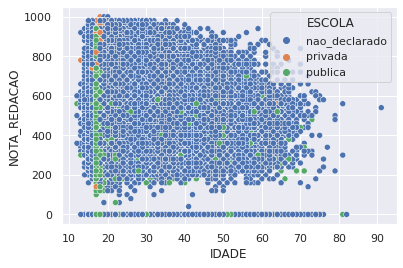

In [38]:
df_scatterplot = df
sns.scatterplot(data=df_scatterplot, x=df_scatterplot['IDADE'], y=df_scatterplot['NOTA_REDACAO'], hue=df_scatterplot["ESCOLA"])

Devido a alta quantidade de pessoas que assinalaram "nao_declarado" fica um pouco difícil de visualizar os outros dados, mas conseguimos perceber que temos poucas notas de redação altas a medidade que a idade passa, mas também temos poucas notas de redação baixas, se concentrando mais para o meio.

- Visualização de correlação entre idade e nota de redação com separação de escola

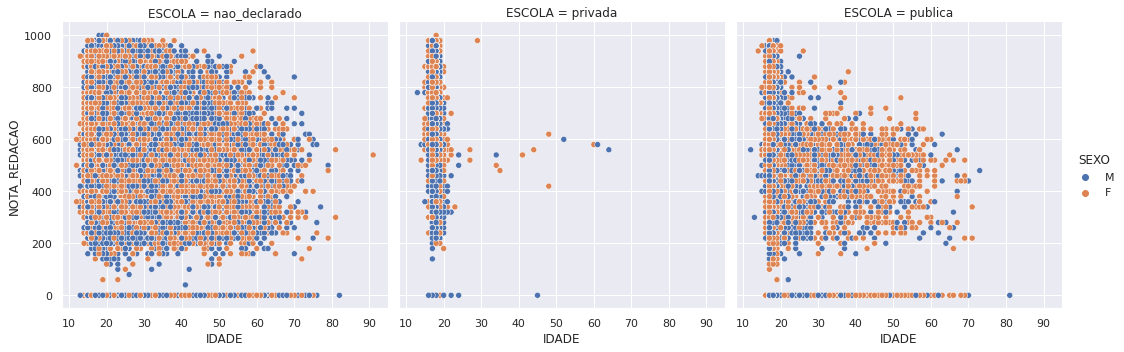

In [40]:
df_relplot = df
sns.relplot(data=df_relplot, x="IDADE",y="NOTA_REDACAO", col=df_relplot["ESCOLA"], hue=df_relplot["SEXO"],kind="scatter")

Separando por tipos de escola conseguimos ter uma análise melhor. Pessoas que são de escola privada fazem o ENEM até uma certa idade (24 anos, por exemplo), depois poucos tendem a continuar fazendo. Percebemos também que a maioria das notas baixas de redação em escolas privadas são de homens. E para comprovar isso, vamos fazer alguns cálculos.

In [48]:
df_privada = df[df["ESCOLA"]=="privada"]
df_privada_maior_24_anos = df_privada[df_privada["IDADE"]>24]
print("Total de vestibulandos de escola privada:", len(df_privada))
print("Total de vestibulandos de escola privada maiores de 24 anos:", len(df_privada_maior_24_anos))
porcentagem_privada_maior_24_anos = (len(df_privada_maior_24_anos)/len(df_privada))*100
print("Porcentagem dos vestibulandos de escola privada que continuam fazendo ENEM após os 24 anos:", f'{porcentagem_privada_maior_24_anos:.2f}%')

Total de vestibulandos de escola privada: 55923
Total de vestibulandos de escola privada maiores de 24 anos: 15
Porcentagem dos vestibulandos de escola privada que continuam fazendo ENEM após os 24 anos: 0.03%


In [49]:
df_publica = df[df["ESCOLA"]=="publica"]
df_publica_maior_24_anos = df_publica[df_publica["IDADE"]>24]
print("Total de vestibulandos de escola pública:", len(df_publica))
print("Total de vestibulandos de escola pública maiores de 24 anos:", len(df_publica_maior_24_anos))
porcentagem_publica_maior_24_anos = (len(df_publica_maior_24_anos)/len(df_publica))*100
print("Porcentagem dos vestibulandos de escola pública que continuam fazendo ENEM após os 24 anos:", f'{porcentagem_publica_maior_24_anos:.2f}%')

Total de vestibulandos de escola pública: 179334
Total de vestibulandos de escola pública maiores de 24 anos: 2026
Porcentagem dos vestibulandos de escola pública que continuam fazendo ENEM após os 24 anos: 1.13%


Através dos cálculos dos dados apresentados, conseguimos concluir que a proporção de alunos de escola pública com mais de 24 anos no ENEM é maior que a de alunos de escola privada com mais de 24 anos, parecendo que mesmo fazendo o ENEM cedo, os alunos de escola pública continuam fazendo a prova mais vezes para tentar atingir uma nota boa, enquanto alunos de escola privada não tendem a necessitar tal aquisição por não dependerem de uma bolsa 100% na maioria dos casos.